#Assignment : Running time and Time complexity

> Name : ***Dipmay Biswas***

> Enrollment ID : ***2021CSB043***

## Dijkstra Algorithm

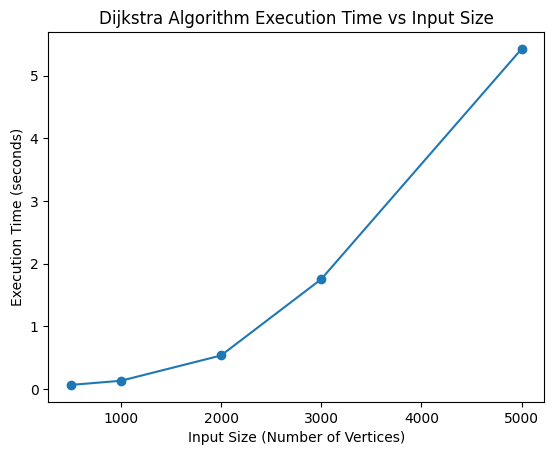

In [4]:
import time
import heapq
import random
import matplotlib.pyplot as plt

def dijkstra(graph, start):
    distances = {vertex: float('infinity') for vertex in graph}
    distances[start] = 0
    priority_queue = [(0, start)]

    while priority_queue:
        current_distance, current_vertex = heapq.heappop(priority_queue)

        if current_distance > distances[current_vertex]:
            continue

        for neighbor, weight in graph[current_vertex].items():
            distance = current_distance + weight

            if distance < distances[neighbor]:
                distances[neighbor] = distance
                heapq.heappush(priority_queue, (distance, neighbor))

    return distances

def generate_random_graph(num_vertices, max_weight=10):
    graph = {i: {} for i in range(num_vertices)}

    for i in range(num_vertices):
        for j in range(i+1, num_vertices):
            weight = random.randint(1, max_weight)
            graph[i][j] = weight
            graph[j][i] = weight

    return graph

def run_dijkstra_and_measure_time(num_vertices):
    graph = generate_random_graph(num_vertices)
    start_vertex = random.randint(0, num_vertices - 1)

    start_time = time.time()
    dijkstra(graph, start_vertex)
    end_time = time.time()

    return end_time - start_time

if __name__ == "__main__":
    input_sizes = [500, 1000, 2000, 3000, 5000]
    execution_times = []

    for size in input_sizes:
        time_taken = run_dijkstra_and_measure_time(size)
        execution_times.append(time_taken)

    plt.plot(input_sizes, execution_times, marker='o')
    plt.title('Dijkstra Algorithm Execution Time vs Input Size')
    plt.xlabel('Input Size (Number of Vertices)')
    plt.ylabel('Execution Time (seconds)')
    plt.show()



Time Complexity -> O ( V 2 )

## Kruskal's Algorithm

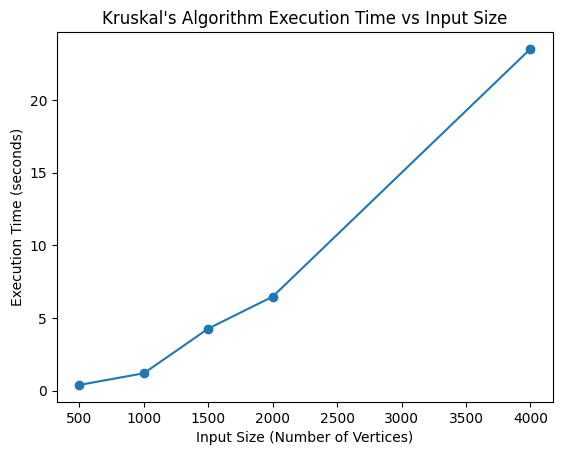

In [5]:
import time
import random
import networkx as nx
import matplotlib.pyplot as plt

class UnionFind:
    def __init__(self, vertices):
        self.parent = {vertex: vertex for vertex in vertices}
        self.rank = {vertex: 0 for vertex in vertices}

    def find(self, vertex):
        if self.parent[vertex] != vertex:
            self.parent[vertex] = self.find(self.parent[vertex])
        return self.parent[vertex]

    def union(self, root1, root2):
        if self.rank[root1] < self.rank[root2]:
            self.parent[root1] = root2
        elif self.rank[root1] > self.rank[root2]:
            self.parent[root2] = root1
        else:
            self.parent[root1] = root2
            self.rank[root2] += 1

def kruskal(graph):
    edges = [(graph[u][v]['weight'], u, v) for u, v in graph.edges()]
    edges.sort()

    spanning_tree = nx.Graph()
    union_find = UnionFind(graph.nodes)

    for weight, u, v in edges:
        root1 = union_find.find(u)
        root2 = union_find.find(v)

        if root1 != root2:
            union_find.union(root1, root2)
            spanning_tree.add_edge(u, v, weight=weight)

    return spanning_tree

def generate_random_graph(num_vertices, max_weight=10):
    graph = nx.complete_graph(num_vertices)
    for u, v in graph.edges():
        graph[u][v]['weight'] = random.randint(1, max_weight)
    return graph

def run_kruskal_and_measure_time(num_vertices):
    graph = generate_random_graph(num_vertices)

    start_time = time.time()
    kruskal(graph)
    end_time = time.time()

    return end_time - start_time

if __name__ == "__main__":
    input_sizes = [500, 1000, 1500, 2000, 4000]
    execution_times = []

    for size in input_sizes:
        time_taken = run_kruskal_and_measure_time(size)
        execution_times.append(time_taken)

    plt.plot(input_sizes, execution_times, marker='o')
    plt.title('Kruskal\'s Algorithm Execution Time vs Input Size')
    plt.xlabel('Input Size (Number of Vertices)')
    plt.ylabel('Execution Time (seconds)')
    plt.show()


Time Complexity -> O(E log V)

## Merge Sort (internal) Algorithm




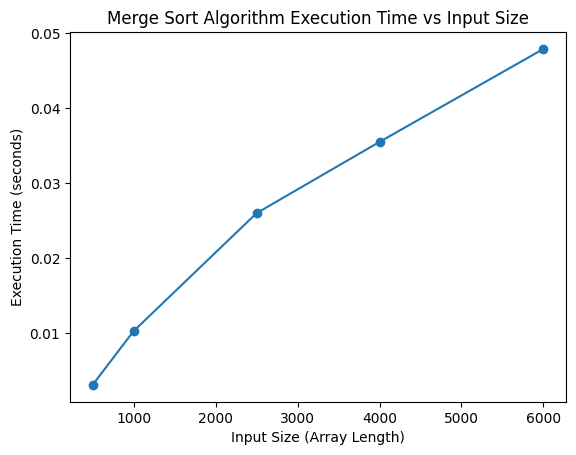

In [10]:
import time
import random
import matplotlib.pyplot as plt

def merge_sort(arr):
    if len(arr) <= 1:
        return arr

    mid = len(arr) // 2
    left_half = arr[:mid]
    right_half = arr[mid:]

    left_half = merge_sort(left_half)
    right_half = merge_sort(right_half)

    return merge(left_half, right_half)

def merge(left, right):
    result = []
    left_index, right_index = 0, 0

    while left_index < len(left) and right_index < len(right):
        if left[left_index] < right[right_index]:
            result.append(left[left_index])
            left_index += 1
        else:
            result.append(right[right_index])
            right_index += 1

    result.extend(left[left_index:])
    result.extend(right[right_index:])

    return result

def run_merge_sort_and_measure_time(arr):
    start_time = time.time()
    merge_sort(arr)
    end_time = time.time()

    return end_time - start_time

if __name__ == "__main__":
    input_sizes = [500, 1000, 2500, 4000, 6000]
    execution_times = []

    for size in input_sizes:
        input_array = random.sample(range(1, 7000), size)
        time_taken = run_merge_sort_and_measure_time(input_array)
        execution_times.append(time_taken)

    plt.plot(input_sizes, execution_times, marker='o')
    plt.title('Merge Sort Algorithm Execution Time vs Input Size')
    plt.xlabel('Input Size (Array Length)')
    plt.ylabel('Execution Time (seconds)')
    plt.show()


Time Complexity -> O(n log n)

## Tower of Hanoi Algorithm


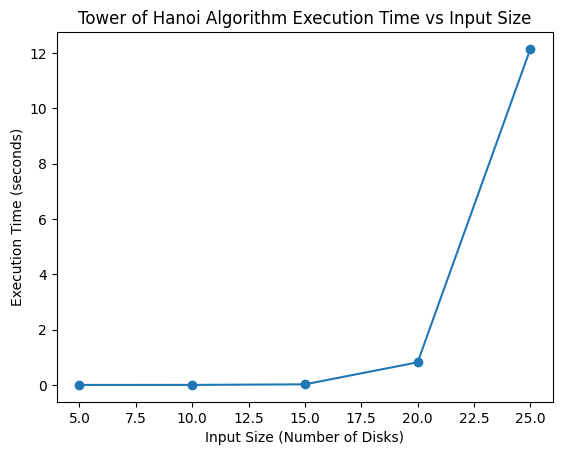

In [ ]:
import time
import matplotlib.pyplot as plt

def tower_of_hanoi(n, source, target, auxiliary, moves):
    if n == 1:
        moves.append((source, target))
        return
    tower_of_hanoi(n - 1, source, auxiliary, target, moves)
    moves.append((source, target))
    tower_of_hanoi(n - 1, auxiliary, target, source, moves)

def run_tower_of_hanoi_and_measure_time(n):
    moves = []
    start_time = time.time()
    tower_of_hanoi(n, 'A', 'C', 'B', moves)
    end_time = time.time()
    return end_time - start_time

if __name__ == "__main__":
    input_sizes = [5, 10, 15, 20, 25]
    execution_times = []

    for size in input_sizes:
        time_taken = run_tower_of_hanoi_and_measure_time(size)
        execution_times.append(time_taken)

    plt.plot(input_sizes, execution_times, marker='o')
    plt.title('Tower of Hanoi Algorithm Execution Time vs Input Size')
    plt.xlabel('Input Size (Number of Disks)')
    plt.ylabel('Execution Time (seconds)')
    plt.show()


Time Complexity -> O(2^n)

## N Queen Algorithm

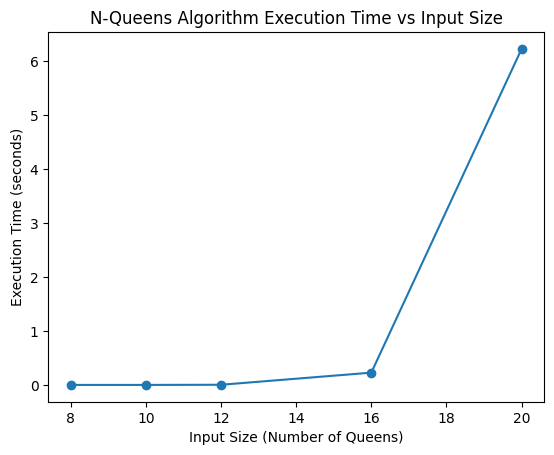

In [11]:

def isSafe(board, row, col,N):

	# Check this row on left side
	for i in range(col):
		if board[row][i] == 1:
			return False

	# Check upper diagonal on left side
	for i, j in zip(range(row, -1, -1), range(col, -1, -1)):
		if board[i][j] == 1:
			return False

	# Check lower diagonal on left side
	for i, j in zip(range(row, N, 1), range(col, -1, -1)):
		if board[i][j] == 1:
			return False

	return True

def solveNQUtil(board,col,N):
	# base case: If all queens are placed
	# then return true
	if col >= N:
		return True

	# Consider this column and try placing
	# this queen in all rows one by one
	for i in range(N):

		if isSafe(board, i, col,N):
			# Place this queen in board[i][col]
			board[i][col] = 1

			# recur to place rest of the queens
			if solveNQUtil(board, col + 1,N) == True:
				return True

			# If placing queen in board[i][col
			# doesn't lead to a solution, then
			# queen from board[i][col]
			board[i][col] = 0

	# if the queen can not be placed in any row in
	# this column col then return false
	return False



def n_queens(n):
    board = [[0] * n for _ in range(n)]
    solutions = []
    if solveNQUtil(board, 0,n) == False:
      print ("Solution does not exist")
      return False

    #printSolution(board,n)
    return True

def run_n_queens_and_measure_time(n):
    start_time = time.time()
    n_queens(n)
    end_time = time.time()

    return end_time - start_time

if __name__ == "__main__":
    input_sizes = [8, 10, 12, 16, 20]
    execution_times = []

    for size in input_sizes:
        time_taken = run_n_queens_and_measure_time(size)
        execution_times.append(time_taken)

    plt.plot(input_sizes, execution_times, marker='o')
    plt.title('N-Queens Algorithm Execution Time vs Input Size')
    plt.xlabel('Input Size (Number of Queens)')
    plt.ylabel('Execution Time (seconds)')
    plt.show()


Time Complexity -> O(N!)

## Thank you!